In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import numpy as np
import json
import datetime
import scipy
from scipy import linspace, polyval, polyfit, sqrt, stats, randn, optimize
from pylab import plot, title, show , legend

import plotly
from plotly.graph_objs import Scatter, Layout

In [2]:
years = ['2003','2004','2005','2006','2007','2008']

totalM = pd.Series()
distC = pd.Series()
distM = pd.Series()
distG = pd.Series()
ctotalM = pd.Series()
cdistC = pd.Series()
cdistM = pd.Series()
cdistG = pd.Series()
dtotalM = pd.Series()
ddistC = pd.Series()
ddistM = pd.Series()
ddistG = pd.Series()

dctotalM = pd.Series()
dcdistC = pd.Series()
dcdistM = pd.Series()
dcdistG = pd.Series()

dwtotalM = pd.Series()
dwdistC = pd.Series()
dwdistM = pd.Series()
dwdistG = pd.Series()

dntotalM = pd.Series()
dndistC = pd.Series()
dndistM = pd.Series()
dndistG = pd.Series()

dstotalM = pd.Series()
dsdistC = pd.Series()
dsdistM = pd.Series()
dsdistG = pd.Series()

dltotalM = pd.Series()
dldistC = pd.Series()
dldistM = pd.Series()
dldistG = pd.Series()

r1 = 400
r2 = 800
for year in years:
    df = pd.read_csv(year+'.csv')

    ser = df.groupby(['Year','Month'])['Month'].count()
    totalM = totalM.append(ser)
    ser = df[df.Distance <= r1].groupby(['Year','Month'])['Month'].count()
    distC = distC.append(ser)
    ser = df[(df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    distM = distM.append(ser)
    ser = df[df.Distance > r2].groupby(['Year','Month'])['Month'].count()
    distG = distG.append(ser)

    ser = df[df.Cancelled > 0].groupby(['Year','Month'])['Month'].count()
    ctotalM = ctotalM.append(ser)
    ser = df[(df.Cancelled > 0) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    cdistC = cdistC.append(ser)
    ser = df[(df.Cancelled > 0) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    cdistM = cdistM.append(ser)
    ser = df[(df.Cancelled > 0) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    cdistG = cdistG.append(ser)

    ser = df[(df.CarrierDelay > 0) | (df.WeatherDelay > 0) | (df.NASDelay > 0) | (df.SecurityDelay > 0) | (df.LateAircraftDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dtotalM = dtotalM.append(ser)
    ser = df[((df.CarrierDelay > 0) | (df.WeatherDelay > 0) | (df.NASDelay > 0) | (df.SecurityDelay > 0) | (df.LateAircraftDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    ddistC = ddistC.append(ser)
    ser = df[((df.CarrierDelay > 0) | (df.WeatherDelay > 0) | (df.NASDelay > 0) | (df.SecurityDelay > 0) | (df.LateAircraftDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    ddistM = ddistM.append(ser)
    ser = df[((df.CarrierDelay > 0) | (df.WeatherDelay > 0) | (df.NASDelay > 0) | (df.SecurityDelay > 0) | (df.LateAircraftDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    ddistG = ddistG.append(ser)

    ser = df[(df.CarrierDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dctotalM = dctotalM.append(ser)
    ser = df[((df.CarrierDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    dcdistC = dcdistC.append(ser)
    ser = df[((df.CarrierDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    dcdistM = dcdistM.append(ser)
    ser = df[((df.CarrierDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    dcdistG = dcdistG.append(ser)

    ser = df[(df.WeatherDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dwtotalM = dwtotalM.append(ser)
    ser = df[((df.WeatherDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    dwdistC = dwdistC.append(ser)
    ser = df[((df.WeatherDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    dwdistM = dwdistM.append(ser)
    ser = df[((df.WeatherDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    dwdistG = dwdistG.append(ser)

    ser = df[(df.NASDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dntotalM = dntotalM.append(ser)
    ser = df[((df.NASDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    dndistC = dndistC.append(ser)
    ser = df[((df.NASDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    dndistM = dndistM.append(ser)
    ser = df[((df.NASDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    dndistG = dndistG.append(ser)

    ser = df[(df.SecurityDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dstotalM = dstotalM.append(ser)
    ser = df[((df.SecurityDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    dsdistC = dsdistC.append(ser)
    ser = df[((df.SecurityDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    dsdistM = dsdistM.append(ser)
    ser = df[((df.SecurityDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    dsdistG = dsdistG.append(ser)

    ser = df[(df.LateAircraftDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dltotalM = dltotalM.append(ser)
    ser = df[((df.LateAircraftDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    dldistC = dldistC.append(ser)
    ser = df[((df.LateAircraftDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    dldistM = dldistM.append(ser)
    ser = df[((df.LateAircraftDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    dldistG = dldistG.append(ser)

/home/ignacio/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.



In [42]:
#Dep Time
years = ['2003','2004','2005','2006','2007','2008']

totalM = pd.Series()
distC = pd.Series()
distM = pd.Series()
distG = pd.Series()
ctotalM = pd.Series()
cdistC = pd.Series()
cdistM = pd.Series()
cdistG = pd.Series()
dtotalM = pd.Series()
ddistC = pd.Series()
ddistM = pd.Series()
ddistG = pd.Series()

dctotalM = pd.Series()
dcdistC = pd.Series()
dcdistM = pd.Series()
dcdistG = pd.Series()

dwtotalM = pd.Series()
dwdistC = pd.Series()
dwdistM = pd.Series()
dwdistG = pd.Series()

dntotalM = pd.Series()
dndistC = pd.Series()
dndistM = pd.Series()
dndistG = pd.Series()

dstotalM = pd.Series()
dsdistC = pd.Series()
dsdistM = pd.Series()
dsdistG = pd.Series()

dltotalM = pd.Series()
dldistC = pd.Series()
dldistM = pd.Series()
dldistG = pd.Series()

r1 = 400
r2 = 800
for year in years:
    df = pd.read_csv(year+'.csv')

    ser = df.groupby(['Year','Month'])['Month'].count()
    totalM = totalM.append(ser)
    ser = df[(df.DepDelay > 0) & df.Distance <= r1].groupby(['Year','Month'])['Month'].count()
    distC = distC.append(ser)
    ser = df[(df.DepDelay > 0) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    distM = distM.append(ser)
    ser = df[(df.DepDelay > 0) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    distG = distG.append(ser)

    ser = df[(df.DepDelay > 0) & df.Cancelled > 0].groupby(['Year','Month'])['Month'].count()
    ctotalM = ctotalM.append(ser)
    ser = df[(df.DepDelay > 0) & (df.Cancelled > 0) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    cdistC = cdistC.append(ser)
    ser = df[(df.DepDelay > 0) & (df.Cancelled > 0) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    cdistM = cdistM.append(ser)
    ser = df[(df.DepDelay > 0) & (df.Cancelled > 0) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    cdistG = cdistG.append(ser)

    ser = df[(df.DepDelay > 0) & (df.CarrierDelay > 0) | (df.WeatherDelay > 0) | (df.NASDelay > 0) | (df.SecurityDelay > 0) | (df.LateAircraftDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dtotalM = dtotalM.append(ser)
    ser = df[(df.DepDelay > 0) & ((df.CarrierDelay > 0) | (df.WeatherDelay > 0) | (df.NASDelay > 0) | (df.SecurityDelay > 0) | (df.LateAircraftDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    ddistC = ddistC.append(ser)
    ser = df[(df.DepDelay > 0) & ((df.CarrierDelay > 0) | (df.WeatherDelay > 0) | (df.NASDelay > 0) | (df.SecurityDelay > 0) | (df.LateAircraftDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    ddistM = ddistM.append(ser)
    ser = df[(df.DepDelay > 0) & ((df.CarrierDelay > 0) | (df.WeatherDelay > 0) | (df.NASDelay > 0) | (df.SecurityDelay > 0) | (df.LateAircraftDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    ddistG = ddistG.append(ser)

    ser = df[(df.DepDelay > 0) & (df.CarrierDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dctotalM = dctotalM.append(ser)
    ser = df[(df.DepDelay > 0) & ((df.CarrierDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    dcdistC = dcdistC.append(ser)
    ser = df[(df.DepDelay > 0) & ((df.CarrierDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    dcdistM = dcdistM.append(ser)
    ser = df[(df.DepDelay > 0) & ((df.CarrierDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    dcdistG = dcdistG.append(ser)

    ser = df[(df.DepDelay > 0) & (df.WeatherDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dwtotalM = dwtotalM.append(ser)
    ser = df[(df.DepDelay > 0) & ((df.WeatherDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    dwdistC = dwdistC.append(ser)
    ser = df[(df.DepDelay > 0) & ((df.WeatherDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    dwdistM = dwdistM.append(ser)
    ser = df[(df.DepDelay > 0) & ((df.WeatherDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    dwdistG = dwdistG.append(ser)

    ser = df[(df.DepDelay > 0) & (df.NASDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dntotalM = dntotalM.append(ser)
    ser = df[(df.DepDelay > 0) & ((df.NASDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    dndistC = dndistC.append(ser)
    ser = df[(df.DepDelay > 0) & ((df.NASDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    dndistM = dndistM.append(ser)
    ser = df[(df.DepDelay > 0) & ((df.NASDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    dndistG = dndistG.append(ser)

    ser = df[(df.DepDelay > 0) & (df.SecurityDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dstotalM = dstotalM.append(ser)
    ser = df[(df.DepDelay > 0) & ((df.SecurityDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    dsdistC = dsdistC.append(ser)
    ser = df[(df.DepDelay > 0) & ((df.SecurityDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    dsdistM = dsdistM.append(ser)
    ser = df[(df.DepDelay > 0) & ((df.SecurityDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    dsdistG = dsdistG.append(ser)

    ser = df[(df.DepDelay > 0) & (df.LateAircraftDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dltotalM = dltotalM.append(ser)
    ser = df[(df.DepDelay > 0) & ((df.LateAircraftDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    dldistC = dldistC.append(ser)
    ser = df[(df.DepDelay > 0) & ((df.LateAircraftDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    dldistM = dldistM.append(ser)
    ser = df[(df.DepDelay > 0) & ((df.LateAircraftDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    dldistG = dldistG.append(ser)

/home/ignacio/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.



TP:

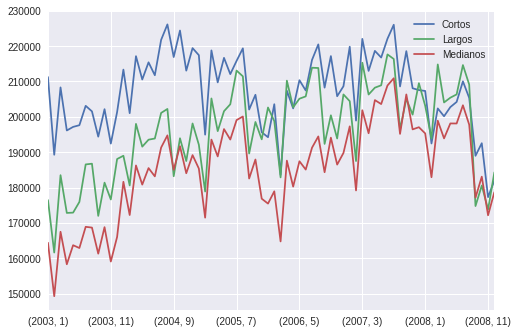

In [8]:
#Figura Distancia 1
data = pd.DataFrame({
    
                    'Cortos': distC,
                    'Medianos': distM,
                    'Largos' : distG
})
data.plot()
plt.show()

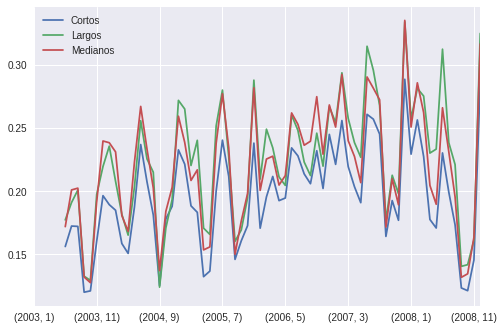

In [9]:
#Figura Distancia 2
data = pd.DataFrame({
    
                    'Cortos': (ddistC/distC),
                    'Medianos': (ddistM/distM),
                    'Largos' : (ddistG/distG)
})
data.plot()
plt.show()

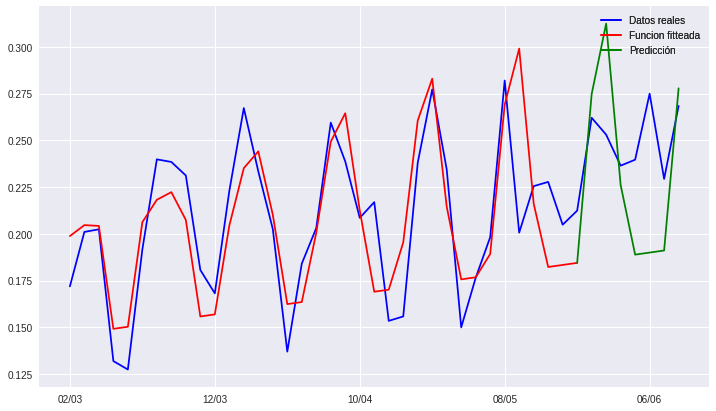

0.0009637746014157214

In [37]:
#Figura Distancia 3
train_y = (ddistM/distM)[5:36].values
train_x = np.arange(0, train_y.size, 1)
fit_y = (ddistM/distM)[5:48].values
fit_x = np.arange(0, fit_y.size, 1) 

def estim(x, a, b, c, d, e, f, g, h):
    return a + b * x + c * np.cos(x*d+e) + f * np.sin(x*g+h) + c * abs(np.cos(x*d+e)) + f * abs(np.sin(x*g+h))


fun = estim
popt, pcov = optimize.curve_fit(fun, train_x, train_y)
y_pred = fun(fit_x, *popt)


plt.figure(figsize=(12,7))
# Datos
data_plt, = plt.plot(fit_x, fit_y, 'b-', label='Datos reales')

# Entrenamiento
fit_plt, = plt.plot(fit_x[0:36], y_pred[0:36], 'r-', label='Funcion fitteada')

# Prediccion
pred_plt, = plt.plot(fit_x[35:48], y_pred[35:48], 'g-', label='Predicción')

# Leyendas
legend = plt.legend(handles=[data_plt, fit_plt, pred_plt], loc=1)
ax = plt.gca().add_artist(legend)

# Labels eje X
def formatter_fun(x, p):
    month = 1 + x
    year = int(2003 + month / 12)
    month = int(month % 12 + 1)
    dat = datetime.date(year,month,1)
    return dat.strftime("%m/%y")

plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(formatter_fun))

plt.show()
np.mean((fit_y - y_pred)**2) ##Error

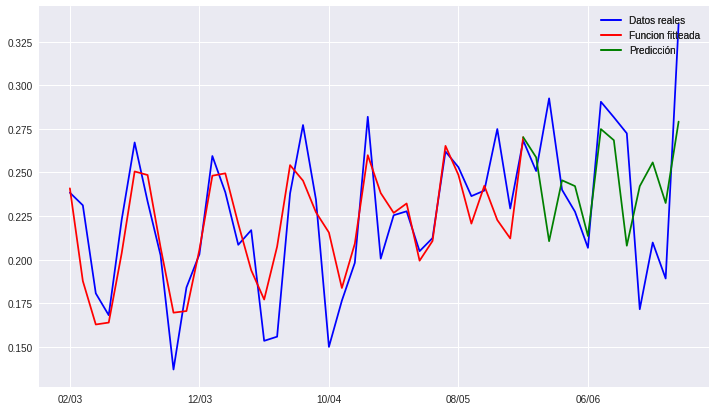

0.00090366900635422288

In [43]:
#Figura Distancia 4
train_y = (ddistM/distM)[12:48].values
train_x = np.arange(0, train_y.size, 1)
fit_y = (ddistM/distM)[12:60].values
fit_x = np.arange(0, fit_y.size, 1) 

def estim(x, a, b, c, d, e, f, g, h):
    return a + b * x + c * np.cos(x*d+e) + f * np.sin(x*g+h) + c * abs(np.cos(x*d+e)) + f * abs(np.sin(x*g+h))

fun = estim
popt, pcov = optimize.curve_fit(fun, train_x, train_y)
y_pred = fun(fit_x, *popt)

plt.figure(figsize=(12,7))
# Datos
data_plt, = plt.plot(fit_x, fit_y, 'b-', label='Datos reales')

# Entrenamiento
fit_plt, = plt.plot(fit_x[0:36], y_pred[0:36], 'r-', label='Funcion fitteada')

# Prediccion
pred_plt, = plt.plot(fit_x[35:48], y_pred[35:48], 'g-', label='Predicción')

# Leyendas
legend = plt.legend(handles=[data_plt, fit_plt, pred_plt], loc=1)
ax = plt.gca().add_artist(legend)

# Labels eje X
def formatter_fun(x, p):
    month = 1 + x
    year = int(2003 + month / 12)
    month = int(month % 12 + 1)
    dat = datetime.date(year,month,1)
    return dat.strftime("%m/%y")

plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(formatter_fun))

plt.show()
np.mean((fit_y - y_pred)**2) ##Error

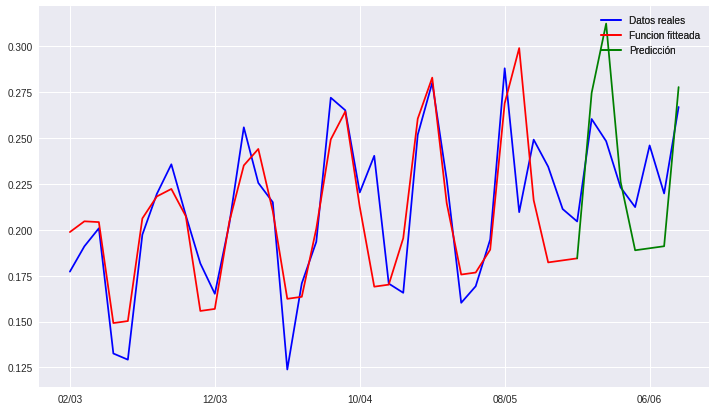

0.00079576329359768241

In [44]:
#Figura Distancia 5
train_y = (ddistM/distM)[5:36].values
train_x = np.arange(0, train_y.size, 1)
fit_y = (ddistG/distG)[5:48].values
fit_x = np.arange(0, fit_y.size, 1) 

def estim(x, a, b, c, d, e, f, g, h):
    return a + b * x + c * np.cos(x*d+e) + f * np.sin(x*g+h) + c * abs(np.cos(x*d+e)) + f * abs(np.sin(x*g+h))

fun = estim
popt, pcov = optimize.curve_fit(fun, train_x, train_y)
y_pred = fun(fit_x, *popt)


plt.figure(figsize=(12,7))
# Datos
data_plt, = plt.plot(fit_x, fit_y, 'b-', label='Datos reales')

# Entrenamiento
fit_plt, = plt.plot(fit_x[0:36], y_pred[0:36], 'r-', label='Funcion fitteada')

# Prediccion
pred_plt, = plt.plot(fit_x[35:48], y_pred[35:48], 'g-', label='Predicción')

# Leyendas
legend = plt.legend(handles=[data_plt, fit_plt, pred_plt], loc=1)
ax = plt.gca().add_artist(legend)

# Labels eje X
def formatter_fun(x, p):
    month = 1 + x
    year = int(2003 + month / 12)
    month = int(month % 12 + 1)
    dat = datetime.date(year,month,1)
    return dat.strftime("%m/%y")

plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(formatter_fun))

plt.show()
np.mean((fit_y - y_pred)**2) ##Error